<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Женя! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

In [1]:
!pip install scikit-learn==1.1.3

In [2]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
import lightgbm as lgbm
import time
import matplotlib.pyplot as plt






from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>

## Подготовка данных

Открываем файл, проверяем информацию

In [3]:
data = pd.read_csv('/datasets/autos.csv')

In [4]:
data.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
222569,2016-03-07 19:52:46,6699,sedan,2005,manual,122,1er,150000,12,gasoline,bmw,no,2016-03-07 00:00:00,0,57636,2016-04-05 05:18:23
82464,2016-03-21 01:36:17,1250,small,1999,manual,0,a_klasse,150000,0,petrol,mercedes_benz,no,2016-03-21 00:00:00,0,69126,2016-04-06 00:47:08
282944,2016-03-21 23:37:35,3150,small,2005,manual,121,ptcruiser,150000,9,gasoline,chrysler,no,2016-03-21 00:00:00,0,4159,2016-04-01 18:45:08
265883,2016-03-16 14:52:10,1190,small,2000,manual,60,lupo,150000,7,gasoline,volkswagen,no,2016-03-16 00:00:00,0,25899,2016-04-04 15:16:18
109825,2016-04-01 23:54:21,699,NaN,2016,NaN,60,golf,150000,6,petrol,volkswagen,NaN,2016-04-01 00:00:00,0,93426,2016-04-06 04:45:16
133167,2016-03-29 19:51:22,7500,suv,1991,manual,118,defender,150000,3,gasoline,land_rover,no,2016-03-29 00:00:00,0,29690,2016-03-29 19:51:22
287236,2016-03-16 16:52:47,800,small,2001,manual,60,other,150000,6,petrol,citroen,no,2016-03-16 00:00:00,0,4928,2016-04-06 21:46:10
156941,2016-04-05 06:56:05,13000,sedan,2010,auto,170,NaN,150000,9,gasoline,mercedes_benz,no,2016-04-05 00:00:00,0,50181,2016-04-07 12:15:48
207151,2016-03-29 14:30:28,11900,NaN,2017,manual,120,clubman,70000,12,petrol,mini,NaN,2016-03-29 00:00:00,0,56170,2016-04-05 13:15:55
31745,2016-03-25 20:36:59,7800,sedan,2008,manual,95,b_klasse,100000,3,petrol,mercedes_benz,yes,2016-03-25 00:00:00,0,20539,2016-03-30 12:16:41


In [5]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

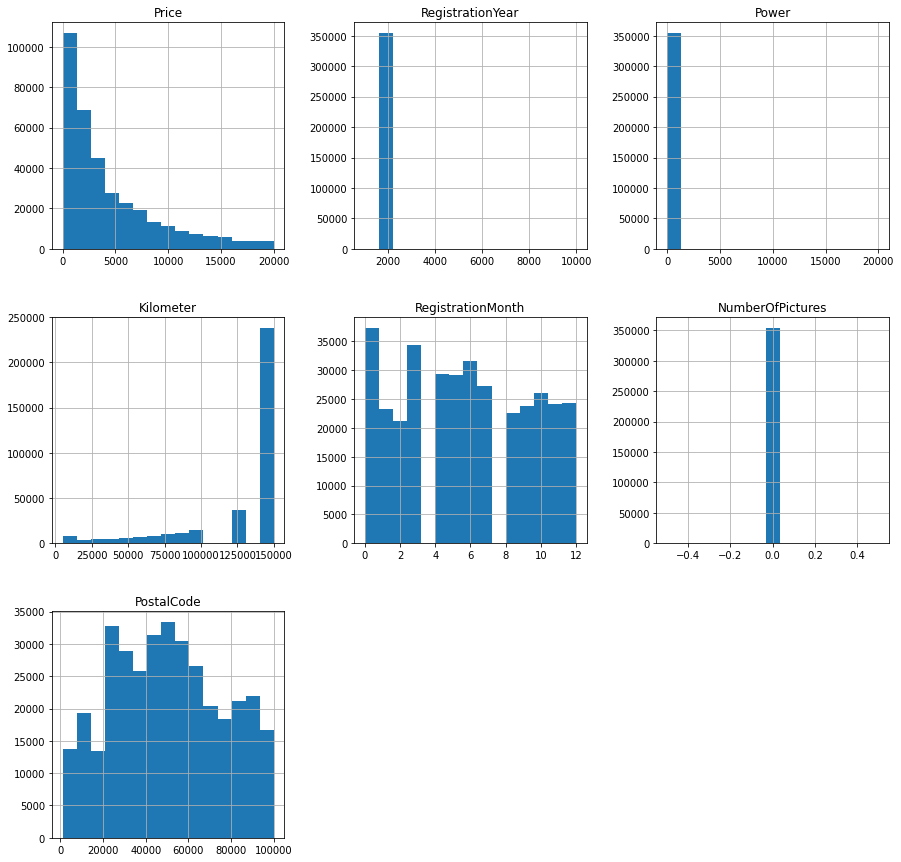

In [7]:
data.hist(bins=15, figsize=(15, 15));

Судя по описанию данных и гистограммам столбцов, данные нуждаются в предобработке

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Заменяем названия столбцов

In [8]:
def snake_name(name):
    n=''
    for i in name:
        if i.isupper():
            n += '_' + i.lower()
        else:
            n += i
    if n[0] == '_':
        n = n[1:]
    return n

In [9]:
data = data.rename(snake_name, axis='columns')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Поиск пропущенных значений в столбцах:

In [10]:
def isna_view(data):
    return (
        (data.isna().mean())
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns = {0:'percent_space'})
        .style.background_gradient('coolwarm').format("{:.1%}"))

In [11]:
isna_view(data)

,percent_space
repaired,20.1%
vehicle_type,10.6%
fuel_type,9.3%
gearbox,5.6%
model,5.6%
date_crawled,0.0%
price,0.0%
registration_year,0.0%
power,0.0%
kilometer,0.0%


Производим преобразование данных в вид, удобный для обучения:

In [12]:
data_train_valid = data.copy()

<AxesSubplot:>

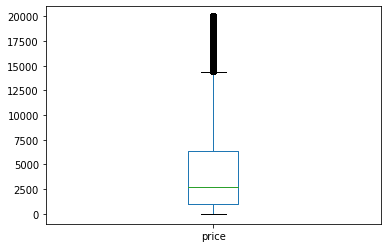

In [13]:
data_train_valid['price'].plot.box()

В столбце с ценами есть верхние выбросы. Медиана около 2500 евро, что достаточно мало, при таком разбросе цен

In [14]:
data_train_valid.query('price < 400')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43
35,2016-03-08 07:54:46,350,NaN,2016,manual,75,golf,150000,4,petrol,volkswagen,no,2016-03-08 00:00:00,0,19386,2016-03-08 09:44:50
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354309,2016-03-09 22:37:41,99,small,1999,manual,60,arosa,150000,1,petrol,seat,yes,2016-03-09 00:00:00,0,91301,2016-04-06 22:15:32
354329,2016-03-30 20:55:30,350,small,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,2016-03-30 00:00:00,0,25436,2016-04-07 13:50:41
354335,2016-04-04 14:41:28,390,small,1997,auto,0,corsa,100000,6,petrol,opel,yes,2016-04-04 00:00:00,0,17509,2016-04-06 15:46:11
354338,2016-03-31 19:52:33,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Выбросить машину в Германии удовольствие не из дешёвых, я бы не считал дешёвые машины аномалией ))</font>

Объектов с ценами меньше 400 евро 30019, избавимся от них так как данные цены не являются реальными

In [15]:
data_train_valid = data_train_valid.query('price > 400')

In [16]:
data_train_valid.query('price > 15000')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
14,2016-03-21 12:57:01,17999,suv,2011,manual,190,navara,70000,3,gasoline,nissan,no,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42
33,2016-03-25 21:48:47,18000,sedan,2007,auto,218,3er,20000,5,petrol,bmw,no,2016-03-25 00:00:00,0,39179,2016-04-07 04:45:21
172,2016-03-07 12:38:19,19750,convertible,2006,manual,305,mustang,50000,7,petrol,ford,no,2016-03-07 00:00:00,0,38350,2016-03-12 20:18:29
179,2016-03-08 20:58:31,16449,wagon,2015,auto,110,fabia,10000,8,petrol,skoda,no,2016-03-08 00:00:00,0,95502,2016-04-06 01:17:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354210,2016-03-25 19:38:19,17990,bus,2007,auto,174,transporter,125000,7,gasoline,volkswagen,no,2016-03-25 00:00:00,0,93453,2016-04-07 01:17:57
354279,2016-03-11 11:59:21,16500,suv,2013,manual,116,i_reihe,30000,9,gasoline,hyundai,no,2016-03-11 00:00:00,0,76297,2016-04-07 06:16:09
354286,2016-03-21 20:44:38,16500,coupe,1973,manual,200,other,150000,6,petrol,bmw,yes,2016-03-21 00:00:00,0,74722,2016-04-06 19:16:32
354306,2016-04-02 23:25:40,16999,wagon,2008,auto,269,a6,150000,7,gasoline,audi,no,2016-04-02 00:00:00,0,61440,2016-04-06 15:17:04


В верхние выбросы цен могут попасть уникальные объекты, цены на которые могут быть далеки от медианной

In [17]:
data_train_valid['model'].sort_values().unique()

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
       'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos',
       'escort', 'espac

В столбце с моделями присутствует категория "other", эти данные нудно удалить, так как модель является одной из важных для обучения признаков. Также избавимся от объектов с отсутсвующим указанием модели. Также присутсвуют дубликаты моделей Land rover. Устраним эти ошибки позже

In [18]:
data_train_valid = data_train_valid[data_train_valid['model'].isna() == False]

In [19]:
data_train_valid = data_train_valid[data_train_valid['model'] != 'other']

In [20]:
data_train_valid['brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'subaru', 'suzuki', 'toyota', 'trabant', 'volkswagen', 'volvo'],
      dtype=object)

В данном столбце данные адекватные, дубликаты отсутсвуют

Создаем столбец brand_model, который в дальнейшем будем использовать в обучении:

In [21]:
data_train_valid['brand_model'] = data_train_valid['brand'] + '_' + data_train_valid['model']

In [22]:
brand_model_list = data_train_valid['brand_model'].sort_values().unique()

Убираем дубликаты моделей land rover:

In [23]:
data_train_valid.loc[
    data_train_valid.query('brand_model == "rover_defender"').index, 'brand_model'
] = 'land_rover_defender'

In [24]:
data_train_valid.loc[
    data_train_valid.query('brand_model == "rover_discovery"').index, 'brand_model'
] = 'land_rover_discovery'

In [25]:
data_train_valid.loc[
    data_train_valid.query('brand_model == "rover_freelander"').index, 'brand_model'
] = 'land_rover_freelander'

In [26]:
data_train_valid.loc[
    data_train_valid.query('brand_model == "rover_rangerover"').index, 'brand_model'
] = 'land_rover_range_rover'

In [27]:
data_train_valid = data_train_valid.query('brand_model.isin(["land_rover_range_rover_evoque"]) == False')

In [28]:
data_train_valid.loc[
    data_train_valid.query(
        'brand_model.isin(["land_rover_serie_1", "land_rover_serie_2", "land_rover_serie_3"])'
    ).index, 'brand_model'
] = 'land_rover_range_rover_serie'

Переводим признаки со временем в формат datetime:

In [29]:
data_train_valid['date_crawled'] = pd.to_datetime(data_train_valid['date_crawled'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
data_train_valid['date_created'] = pd.to_datetime(data_train_valid['date_created'], format='%Y-%m-%dT%H:%M:%S')

In [31]:
data_train_valid['last_seen'] = pd.to_datetime(data_train_valid['last_seen'], format='%Y-%m-%dT%H:%M:%S')

Проверяем столбец date_created:

<AxesSubplot:>

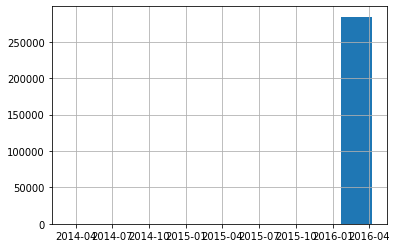

In [32]:
data_train_valid['date_created'].hist()

In [33]:
pd.DatetimeIndex(data_train_valid['date_created']).year.value_counts()

2016    284630
2015        23
2014         1
Name: date_created, dtype: int64

Данные созданы в основном в 2016 году. Проверим даты в 2015 году, данные 2014 года удаляем, как неактуальные:

In [34]:
data_train_valid = data_train_valid[pd.DatetimeIndex(data_train_valid['date_created']).year != 2014]

In [35]:
year_2015 = data_train_valid[pd.DatetimeIndex(data_train_valid['date_created']).year == 2015]

In [36]:
year_2015.sort_values('date_created')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen,brand_model
342275,2016-03-05 21:44:26,10400,bus,1993,NaN,0,ducato,30000,1,gasoline,fiat,NaN,2015-06-18,0,76275,2016-04-05 17:46:09,fiat_ducato
86601,2016-04-02 19:47:40,14250,convertible,2005,manual,163,slk,150000,6,petrol,mercedes_benz,no,2015-08-07,0,76228,2016-04-07 09:15:23,mercedes_benz_slk
175103,2016-03-08 17:57:45,5200,convertible,2006,manual,109,2_reihe,80000,11,petrol,peugeot,no,2015-08-10,0,26382,2016-04-05 20:46:54,peugeot_2_reihe
75598,2016-03-14 08:43:53,600,small,2005,manual,54,polo,150000,1,petrol,volkswagen,yes,2015-09-04,0,72669,2016-03-15 14:16:58,volkswagen_polo
221002,2016-03-15 01:56:49,600,small,2005,manual,54,polo,150000,1,petrol,volkswagen,yes,2015-09-04,0,72669,2016-03-15 15:49:29,volkswagen_polo
340616,2016-03-05 21:51:02,9500,small,2013,manual,90,corsa,50000,4,gasoline,opel,no,2015-09-09,0,98739,2016-04-05 17:46:04,opel_corsa
9972,2016-03-05 17:53:53,3490,sedan,2006,manual,88,clio,150000,3,petrol,renault,no,2015-11-02,0,40880,2016-03-17 15:46:57,renault_clio
161567,2016-03-05 14:31:01,15500,wagon,2009,manual,160,a4,100000,11,petrol,audi,no,2015-11-08,0,56410,2016-04-06 23:15:36,audi_a4
282938,2016-03-23 23:37:01,5499,sedan,2009,manual,95,2_reihe,70000,3,petrol,peugeot,no,2015-11-10,0,22941,2016-04-07 09:15:21,peugeot_2_reihe
75684,2016-03-14 18:44:30,5400,small,2009,manual,44,ypsilon,40000,9,petrol,lancia,no,2015-11-12,0,53119,2016-04-06 03:16:57,lancia_ypsilon


Сохраняем данные после ноября 2015 года:

In [37]:
data_train_valid = data_train_valid.drop(index=year_2015[pd.DatetimeIndex(year_2015['date_created']).month < 11].index)

In [38]:
data_train_valid.query('registration_year == 2016')['registration_month'].unique()

array([ 6,  1,  0,  9, 12, 10,  5,  3,  8,  4,  7, 11,  2])

In [39]:
pd.DatetimeIndex(data_train_valid.query('registration_year == 2016')['date_created']).month.value_counts()

3    4939
4     971
2       2
1       1
Name: date_created, dtype: int64

Объявления с машинами 2016 года регистрации созданы в первые 4 месяца 2016 года, при этом месяцы регистрации указаны и в других месяцах 2016 года. Удаляем эти некорректные данные:

In [40]:
data_train_valid['month_created'] = pd.DatetimeIndex(data_train_valid['date_created']).month

In [41]:
data_train_valid = data_train_valid.drop(
    data_train_valid.query('registration_year == 2016 and month_created < registration_month').index
)

Проверяем столбец с годами регистрации:

<AxesSubplot:>

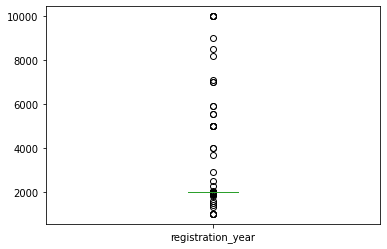

In [42]:
data_train_valid['registration_year'].plot.box()

В данных присутсвуют выбросы, избавимся от них. Точно избавляемся от данных с указанным годом регистрации автомобиля больше 2016 года и меньше 1900.

In [43]:
data_train_valid = data_train_valid.query('1900 < registration_year < 2017')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Остальные выбросы удалим используя правило трех сигм:

In [44]:
min_year = []
auto_names = []
for auto_name in data_train_valid['brand_model'].unique():
    min_year.append(
        int(
            data_train_valid.query('brand_model == @auto_name')['registration_year'].quantile(q=.25) - 1.5*(
                data_train_valid.query('brand_model == @auto_name')['registration_year'].quantile(q=.75) -
                data_train_valid.query('brand_model == @auto_name')['registration_year'].quantile(q=.25)
            )
        )
    )
    auto_names.append(auto_name)

In [45]:
min_years = pd.DataFrame(data={'year': min_year}, index=auto_names)

In [46]:
min_years

,year
volkswagen_golf,1984
jeep_grand,1987
skoda_fabia,1994
bmw_3er,1987
peugeot_2_reihe,1994
...,...
lancia_delta,1971
bmw_i3,1990
lada_samara,1967
volkswagen_amarok,2008


In [47]:
data_train_valid = data_train_valid.join(min_years, on='brand_model').query('registration_year > year')

In [48]:
data_train_valid['registration_year'].sort_values().unique()

array([1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

Проверяем значения в столбце gearbox:

<AxesSubplot:ylabel='gearbox'>

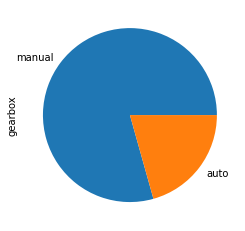

In [49]:
data_train_valid['gearbox'].value_counts().plot.pie()

Заменяем отсутсвующие значения на manual:

In [50]:
data_train_valid['gearbox'].fillna('manual', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверяем значения в столбце repaired:

<AxesSubplot:ylabel='repaired'>

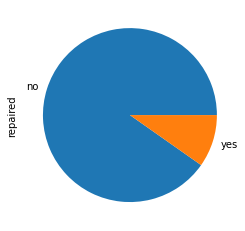

In [51]:
data_train_valid['repaired'].value_counts().plot.pie()

Заменяем отсутсвующие значения на no:

In [52]:
data_train_valid['repaired'].fillna('no', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проверяем значения в столбце fuel_type:

<AxesSubplot:ylabel='fuel_type'>

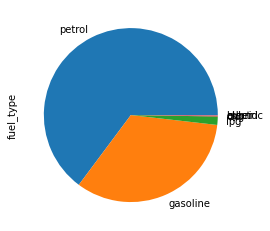

In [53]:
data_train_valid['fuel_type'].value_counts().plot.pie()

Заменяем отсутсвующие значения на petrol:

In [54]:
data_train_valid['fuel_type'].fillna('petrol', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Посмотрим на распределение мощностей для самой популярной модели:

<AxesSubplot:>

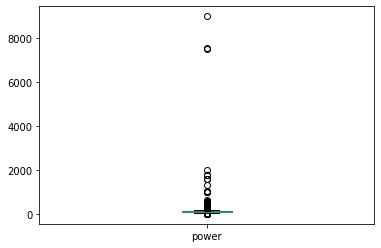

In [55]:
data_train_valid.query('brand_model == "volkswagen_golf"')['power'].plot.box()

Уберем все выбросы с помощью правила трех сигм:

In [56]:
min_power = []
auto_names = []
for auto_name in data_train_valid['brand_model'].unique():
    min_power.append(
        int(
            data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.25) - 1.5*(
                data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.75) -
                data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.25)
            )
        )
    )
    auto_names.append(auto_name)

In [57]:
min_powers = pd.DataFrame(data={'min_power': min_power}, index=auto_names)

In [58]:
max_power = []
auto_names = []
for auto_name in data_train_valid['brand_model'].unique():
    max_power.append(
        int(
            data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.75) + 1.5*(
                data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.75) -
                data_train_valid.query('brand_model == @auto_name')['power'].quantile(q=.25)
            )
        )
    )
    auto_names.append(auto_name)

In [59]:
max_powers = pd.DataFrame(data={'max_power': max_power}, index=auto_names)


In [60]:
max_powers

,max_power
volkswagen_golf,175
jeep_grand,305
skoda_fabia,119
bmw_3er,251
peugeot_2_reihe,163
...,...
bmw_i3,361
lada_samara,162
volkswagen_amarok,163
lancia_kappa,165


In [61]:
data_train_valid = data_train_valid.join(
    max_powers, on='brand_model'
).join(
    min_powers, on='brand_model'
).query(
    'min_power < power < max_power'
)

<AxesSubplot:>

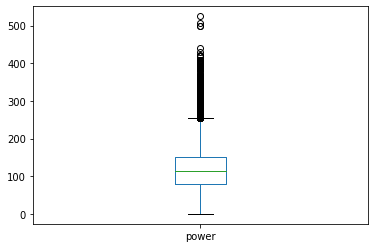

In [62]:
data_train_valid['power'].plot.box()

После обработки убрали выбросы, но остались значения близкие к нулю. Заменим их медианными значениями для моделей

In [63]:
median_power = data_train_valid.pivot_table(index='brand_model', values='power', aggfunc='median')

In [64]:
median_power.columns = ['median_power']

In [65]:
median_power

,median_power
brand_model,
alfa_romeo_145,103.0
alfa_romeo_147,116.0
alfa_romeo_156,150.0
alfa_romeo_159,170.0
alfa_romeo_spider,150.0
...,...
volvo_v40,116.0
volvo_v50,136.0
volvo_v60,163.0


In [66]:
data_train_valid = data_train_valid.join(median_power, on='brand_model')

In [67]:
data_train_valid.loc[data_train_valid['power'] < 25, 'power'] = data_train_valid['median_power']

In [68]:
data_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234387 entries, 2 to 354368
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        234387 non-null  datetime64[ns]
 1   price               234387 non-null  int64         
 2   vehicle_type        230219 non-null  object        
 3   registration_year   234387 non-null  int64         
 4   gearbox             234387 non-null  object        
 5   power               234387 non-null  float64       
 6   model               234387 non-null  object        
 7   kilometer           234387 non-null  int64         
 8   registration_month  234387 non-null  int64         
 9   fuel_type           234387 non-null  object        
 10  brand               234387 non-null  object        
 11  repaired            234387 non-null  object        
 12  date_created        234387 non-null  datetime64[ns]
 13  number_of_pictures  234387 no

Данные обработаны, можно приступать к кодированию признаков.

In [69]:
(1 - len(data_train_valid) / len(data)) *100

33.85792775327413

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Треть данных потеряно.</font>

Удаляем созданные столбцы:

In [70]:
data_clean = data_train_valid.drop(
    ['month_created',
     'year',
     'max_power',
     'min_power',
     'median_power',
     'brand_model'
    ], axis=1
)

Для обучения оставляем следующие признаки: auto, repaired, petrol, brand_model, registration_year, power, kilometer.
Даты создания не влияют на цену, так как временной период ограничен 6 месяцами; vehicle_type зависит от признака brand_model; registration_month также не влияет на цену из-за ограниченного временного периода, number_of_pictures и postal_code не влияют на цену.

In [71]:
data_clean

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
2,2016-03-14 12:52:21,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,no,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109.0,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354359,2016-03-28 13:48:07,7900,sedan,2010,manual,140.0,golf,150000,7,gasoline,volkswagen,no,2016-03-28,0,75223,2016-04-02 18:16:20
354362,2016-03-19 19:53:49,3200,sedan,2004,manual,225.0,leon,150000,5,petrol,seat,yes,2016-03-19,0,96465,2016-03-19 20:44:43
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


Кодируем признаки:

In [72]:
data_clean = data_clean.reset_index()

In [73]:
encoder_or = OrdinalEncoder()
data_clean_or = pd.DataFrame(
    encoder_or.fit_transform(pd.DataFrame(data_clean['brand'] + '_' + data_clean['model'])), columns=['brand_model']
)

In [74]:
encoder_oh = OneHotEncoder(handle_unknown = 'ignore')
data_clean_ohe = pd.DataFrame(encoder_oh.fit_transform(data_clean[['gearbox', 'repaired', 'fuel_type']]).toarray(),
                            columns=encoder_oh.get_feature_names()
                           )

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
col_names = []
for i in data_clean_ohe.columns:
    col_names.append(i[3:])

In [76]:
data_clean_ohe.columns = col_names

In [77]:
data_clean_ohe

,auto,manual,no,yes,cng,electric,gasoline,hybrid,lpg,other,petrol
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
234382,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
234383,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
234384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
234385,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Оставляем признак с видом топлива "бензин", остальные объединяем:

In [78]:
data_clean_ohe['petrol'] = data_clean_ohe['petrol'] + data_clean_ohe['gasoline']
data_clean_ohe = data_clean_ohe[['auto', 'yes', 'petrol']]

In [79]:
data_clean_ohe.columns = ['auto', 'repaired', 'petrol']

In [80]:
data_clean_train_valid = data_clean_ohe.join(data_clean_or).join(data_clean[['registration_year', 'power', 'kilometer', 'price']])

In [81]:
data_clean_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234387 entries, 0 to 234386
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   auto               234387 non-null  float64
 1   repaired           234387 non-null  float64
 2   petrol             234387 non-null  float64
 3   brand_model        234387 non-null  float64
 4   registration_year  234387 non-null  int64  
 5   power              234387 non-null  float64
 6   kilometer          234387 non-null  int64  
 7   price              234387 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 14.3 MB


In [82]:
data_clean_train_valid = data_clean_train_valid.astype('int64')

Строим матрицу диаграмм рассеяния:

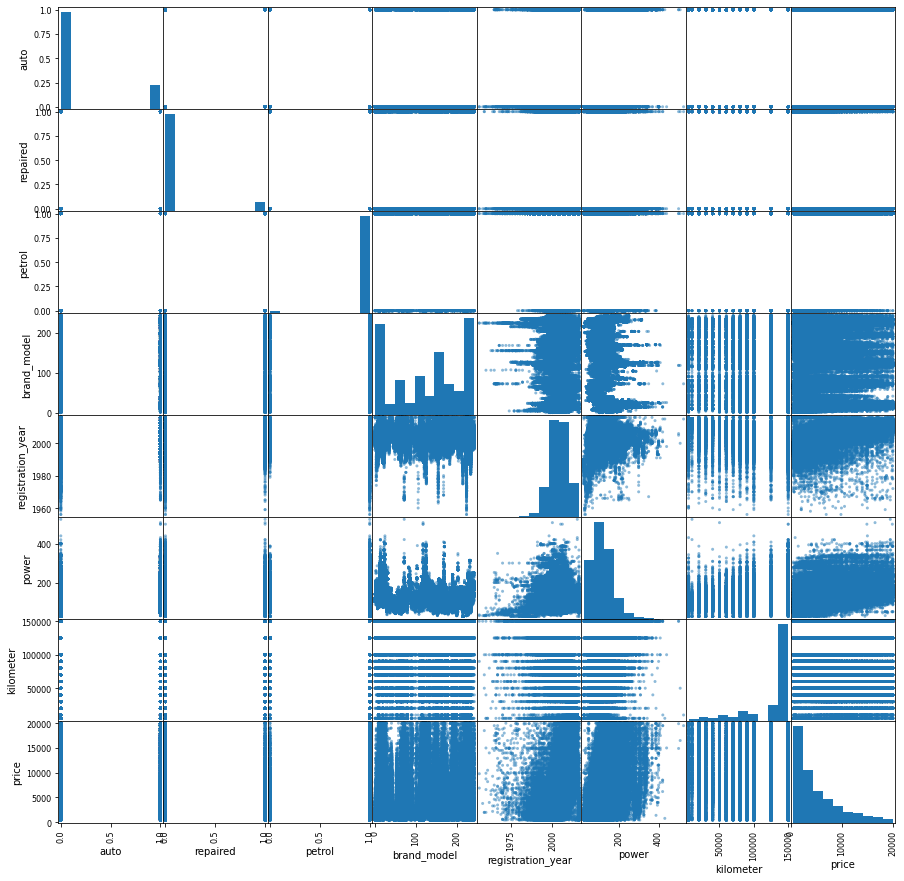

In [83]:
pd.plotting.scatter_matrix(data_clean_train_valid, figsize=(15, 15));

По такому же принципу будем обрабатывать данные в дальнейшем.

Найдем границы интервалов годов и мощностей:

In [84]:
data_change = data.copy()
data_change['brand_model'] = data_change['brand'] + '_' + data_change['model']
data_change = data_change[data_change['brand_model'].isna() == False]
data_change = data_change.query('price > 400 and\
        model.isna() == False and\
        model != "other" and\
        brand != "sonstige_autos" and\
        1900 < registration_year < 2017')
min_year = []
max_power = []
min_power = []
auto_names = []

for auto_name in data_change['brand_model'].unique():
    min_year.append(
        int(
            data_change.query('brand_model == @auto_name')['registration_year'].quantile(q=.25) - 1.5*(
                data_change.query('brand_model == @auto_name')['registration_year'].quantile(q=.75) -
                data_change.query('brand_model == @auto_name')['registration_year'].quantile(q=.25)
            )
        )
    )
    min_power.append(
        int(
            data_change.query('brand_model == @auto_name')['power'].quantile(q=.25) - 1.5*(
                data_change.query('brand_model == @auto_name')['power'].quantile(q=.75) -
                data_change.query('brand_model == @auto_name')['power'].quantile(q=.25)
            )
        )
    )
    max_power.append(
        int(
            data_change.query('brand_model == @auto_name')['power'].quantile(q=.75) + 1.5*(
                data_change.query('brand_model == @auto_name')['power'].quantile(q=.75) -
                data_change.query('brand_model == @auto_name')['power'].quantile(q=.25)
            )
        )
    )
    auto_names.append(auto_name)
min_years = pd.DataFrame(data={'min_year': min_year}, index=auto_names)
max_powers = pd.DataFrame(data={'max_power': max_power}, index=auto_names)
min_powers = pd.DataFrame(data={'min_power': min_power}, index=auto_names)

Создаем функцию обработки признаков:

In [85]:
def clean_dataset(dataset):
    data = pd.DataFrame()
    data = dataset.copy()  
    
    data['date_crawled'] = pd.to_datetime(data['date_crawled'], format='%Y-%m-%dT%H:%M:%S')
    data['date_created'] = pd.to_datetime(data['date_created'], format='%Y-%m-%dT%H:%M:%S')
    data['last_seen'] = pd.to_datetime(data['last_seen'], format='%Y-%m-%dT%H:%M:%S')
    data['month_created'] = pd.DatetimeIndex(data['date_created']).month
    data['brand_model'] = data['brand'] + '_' + data['model']
    
    median_power = data.pivot_table(index='brand_model', values='power', aggfunc='median')
    median_power.columns = ['median_power']
    
    data = data.join(
         max_powers, on='brand_model'
     ).join(
         min_powers, on='brand_model'
     ).join(
         min_years, on='brand_model'
     ).join(
         median_power, on='brand_model'
     )

    data = data[pd.DatetimeIndex(data['date_created']).year != 2014]
    
    year_2015 = data[pd.DatetimeIndex(data['date_created']).year == 2015]
    data = data.drop(
        index=year_2015[pd.DatetimeIndex(year_2015['date_created']).month < 11].index
    )
    data = data.drop(
        data.query('registration_year == 2016 and month_created < registration_month').index
    )
    data.fillna({'gearbox':'manual', 'repaired':'no', 'fuel_type':'petrol'}, inplace=True)

    data = data.query(
        'price > 400 and\
         model.isna() == False and\
         model != "other" and\
         brand != "sonstige_autos" and\
         1900 < registration_year < 2017 and\
         brand_model.isin(["land_rover_range_rover_evoque"]) == False and\
         registration_year > min_year and\
         min_power < power < max_power'
     )
    
    data.loc[data['power'] < 25, 'power'] = data['median_power']

    brand_model_list = data['brand_model'].sort_values().unique()
    data.loc[
         data.query('brand_model == "rover_defender"').index, 'brand_model'
    ] = 'land_rover_defender'
    data.loc[
         data.query('brand_model == "rover_discovery"').index, 'brand_model'
    ] = 'land_rover_discovery'
    data.loc[
         data.query('brand_model == "rover_freelander"').index, 'brand_model'
    ] = 'land_rover_freelander'
    data.loc[
        data.query('brand_model == "rover_rangerover"').index, 'brand_model'
    ] = 'land_rover_range_rover'
    data.loc[
        data.query(
            'brand_model.isin(["land_rover_serie_1", "land_rover_serie_2", "land_rover_serie_3"])'
        ).index, 'brand_model'
    ] = 'land_rover_range_rover_serie'
    
    data = data.drop([
        'date_crawled',
        'vehicle_type',
        'registration_month',
        'date_created',
        'number_of_pictures',
        'postal_code', #?????????????????????????????
        'last_seen',
        'month_created',
        'brand_model',
        'max_power',
        'min_power',
        'min_year',
        'median_power'
    ], axis=1)
    data['brand_model'] = data['brand'] + '_' + data['model']
    
    features = data.drop([
        'price',
        'brand',
        'model'
    ], axis=1)
    target = data['price']
    return features, target, data

In [86]:
encoder_or = OrdinalEncoder(handle_unknown='ignore')

In [87]:
encoder_oh = OneHotEncoder(handle_unknown = 'ignore')

In [88]:
scaler = StandardScaler()

Функция обучения кодировщиков:

In [89]:
def fit_encoders(features_train):
    features = features_train.copy().reset_index()
    encoder_or.fit(pd.DataFrame(features['brand_model']))
    encoder_oh.fit(features[['gearbox', 'repaired', 'fuel_type']])
    
    return encoder_or, encoder_oh

Функция кодировки:

In [90]:
def preprocessing_features(features):
    features = features.copy()
    features_or = pd.DataFrame(
        encoder_or.transform(pd.DataFrame(features['brand_model'], columns=['brand_model'])), columns=['brand_model']
    )
    features_oh = pd.DataFrame(
        encoder_oh.transform(features[['gearbox', 'repaired', 'fuel_type']]).toarray(),
        columns=encoder_oh.get_feature_names()
    )
    col_names = []
    for i in features_oh.columns:
        col_names.append(i[3:])
    
    features_oh.columns = col_names
    
    features_oh['petrol'] = features_oh['petrol'] + features_oh['gasoline']
    
    features_oh = features_oh[['auto', 'yes', 'petrol']]
    
    features_oh.columns = ['auto', 'repaired', 'petrol']
    
    features_preprocess = features_oh.join(
        features_or
    ).join(
        features[['registration_year', 'power', 'kilometer']]
    )
    features_preprocess = features_preprocess.astype('int64')
    
    return features_preprocess

В дальнейшем рассмотрим три варианта обучения и тестирования моделей:

    1. Тестовый набор данных не обработан, train и valid обработаны по алгоритму, рассмотренному выше
    2. train и valid обработаны по алгоритму, рассмотренному выше; таким же образом, перед предсказаниями модели обрабатывается тестовая выборка
    3. Все данные не обработаны


1. Тестовый набор данных не обработан, train и valid обработаны по алгоритму, рассмотренному выше

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Создаем обучающую и валидационную выборки:

In [91]:
data_train_valid, data_test = train_test_split(
    data,
    test_size=0.4, 
    random_state=111, 
    stratify=data['kilometer']
)

In [90]:
start = time.time()

features_train_valid_v1_2 = clean_dataset(data_train_valid)[0]
target_train_valid_v1_2 = clean_dataset(data_train_valid)[1]

features_train_v1_2, features_valid_v1_2, target_train_v1_2, target_valid_v1_2 = train_test_split(
    features_train_valid_v1_2, 
    target_train_valid_v1_2, 
    test_size=0.25, 
    random_state=111, 
    stratify=features_train_valid_v1_2['kilometer']
)

encoder_or_v1_2 = fit_encoders(features_train_v1_2)[0]
encoder_oh_v1_2 = fit_encoders(features_train_v1_2)[1]

train_v1_2_index = features_train_v1_2.index
valid_v1_2_index = features_valid_v1_2.index
features_train_v1_2.reset_index(drop=True, inplace=True)
features_valid_v1_2.reset_index(drop=True, inplace=True)
target_train_v1_2.reset_index(drop=True, inplace=True)
target_valid_v1_2.reset_index(drop=True, inplace=True)

features_train_v1_2 = preprocessing_features(features_train_v1_2)
features_valid_v1_2 = preprocessing_features(features_valid_v1_2)

columns_for_scaling = ['brand_model', 'registration_year', 'power', 'kilometer']
scaler.fit(features_train_v1_2[columns_for_scaling])

features_train_v1_2[columns_for_scaling] = scaler.transform(features_train_v1_2[columns_for_scaling])
features_valid_v1_2[columns_for_scaling] = scaler.transform(features_valid_v1_2[columns_for_scaling])

end = time.time()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [91]:
t_prepr_11 = round(end - start, 2)
t_prepr_11

2.65

Создаем тестовую выборку:

In [92]:
start = time.time()

features_test_v1 = data_test.drop('price', axis=1)
target_test_v1 = data_test['price']

features_test_v1['brand_model'] = features_test_v1['brand'] + '_' + features_test_v1['model']

features_test_v1 = features_test_v1[[
    'registration_year',
    'gearbox',
    'power',
    'kilometer',
    'fuel_type',
    'repaired',
    'brand_model'
]]
features_test_v1.fillna({'gearbox':'manual', 'repaired':'no', 'fuel_type':'petrol'}, inplace=True)
features_test_v1.dropna(inplace=True)
target_test_v1 = pd.DataFrame(target_test_v1.loc[features_test_v1.index])

test_v1_index = features_test_v1.index
features_test_v1.reset_index(drop=True, inplace=True)
target_test_v1.reset_index(drop=True, inplace=True)

features_test_v1 = preprocessing_features(features_test_v1)
features_test_v1[columns_for_scaling] = scaler.transform(features_test_v1[columns_for_scaling])

end = time.time()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [93]:
t_prepr_1 = round(end - start, 2) + t_prepr_11
t_prepr_1

3.08

In [94]:
features_train_v1_2.join(target_train_v1_2)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,0,0,1,1.164794,-0.961692,0.622366,0.590083,2500
1,1,0,1,-0.071756,-0.048632,0.992442,-0.796898,13900
2,0,0,1,1.164794,1.047039,0.827964,-0.796898,10000
3,0,0,1,-1.384012,-0.596468,-0.302824,0.590083,2000
4,0,1,1,-0.740502,-0.413856,0.519567,0.590083,450
...,...,...,...,...,...,...,...,...
105543,0,0,1,-1.497573,0.681815,1.033562,0.590083,9500
105544,0,0,1,0.571755,-0.048632,0.313969,0.590083,2400
105545,0,0,1,0.016569,-0.231244,-0.364504,0.590083,2400
105546,1,0,1,0.407723,-0.231244,0.560687,0.590083,1200


In [95]:
features_valid_v1_2.join(target_valid_v1_2)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,0,0,1,1.051233,-0.048632,-0.200025,0.590083,3500
1,0,0,1,0.445576,0.499203,0.334529,0.590083,5150
2,0,0,1,0.294162,-0.596468,-1.351373,0.590083,1000
3,0,0,1,0.218455,1.412263,0.622366,-2.738670,15450
4,0,0,1,-0.122227,0.316591,0.211170,0.590083,4000
...,...,...,...,...,...,...,...,...
35178,0,0,1,0.571755,1.594875,0.827964,-1.074294,14999
35179,0,0,1,-1.497573,0.133980,0.622366,0.590083,3850
35180,0,0,1,1.139558,1.047039,0.046692,-0.796898,12800
35181,1,0,1,-1.396630,0.864427,0.046692,-1.906482,8999


In [96]:
features_test_v1.join(target_test_v1)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,1,0,1,-1.497573,0.133980,0.889643,0.590083,4950
1,0,0,1,-1.636369,-0.961692,-1.166335,-2.183878,5350
2,0,0,1,-1.384012,-2.239975,-0.076667,0.590083,1500
3,0,0,1,-1.636369,0.864427,0.005572,-1.074294,5900
4,0,0,1,-0.122227,-0.779080,1.033562,-0.796898,2990
...,...,...,...,...,...,...,...,...
133924,0,0,1,-1.384012,-0.413856,0.334529,0.590083,2950
133925,0,0,1,1.164794,0.681815,1.650355,-2.183878,12490
133926,1,0,1,-0.740502,-0.961692,0.231730,-0.103407,900
133927,0,0,1,1.164794,1.047039,-0.816819,-1.629086,8900


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

2. Все данные обработаны перед обучением и тестированием

Обрабатываем тестовую выборку; обучающую и валидационную берем из предыдущего раздела

In [97]:
start = time.time()

features_test_v2 = clean_dataset(data_test)[0]
target_test_v2 = clean_dataset(data_test)[1]

test_v2_index = features_test_v2.index
features_test_v2.reset_index(drop=True, inplace=True)
target_test_v2.reset_index(drop=True, inplace=True)

features_test_v2 = preprocessing_features(features_test_v2)

features_test_v2[columns_for_scaling] = scaler.transform(features_test_v2[columns_for_scaling])

end = time.time()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [98]:
t_prepr_2 = round(end - start, 2) + t_prepr_11
t_prepr_2

4.3

In [99]:
features_test_v2.join(target_test_v2)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,1,0,1,-1.497573,0.133980,0.889643,0.590083,4950
1,0,0,1,-1.384012,-2.239975,-0.076667,0.590083,1500
2,0,0,1,-0.122227,-0.779080,1.033562,-0.796898,2990
3,0,0,1,-1.371394,-1.144303,1.033562,0.590083,2500
4,0,0,1,1.152176,1.047039,-1.351373,-1.629086,3650
...,...,...,...,...,...,...,...,...
93946,0,0,1,0.294162,0.133980,-0.919618,0.590083,1650
93947,1,0,1,-0.160081,0.316591,0.622366,0.590083,6650
93948,0,0,1,-1.384012,-0.413856,0.334529,0.590083,2950
93949,1,0,1,-0.740502,-0.961692,0.231730,-0.103407,900


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

3. Все выборки не обработаны (все возможные пропуски заполнены остальные данные удалены)

In [100]:
features_train_valid_v3 = data_train_valid[['registration_year',
                                   'gearbox',
                                   'power',
                                   'kilometer',
                                   'fuel_type',
                                   'repaired',
                                   'brand',
                                   'model'
                                  ]]
target_train_valid_v3 = data_train_valid['price']
features_train_valid_v3.fillna({'gearbox':'manual', 'repaired':'no', 'fuel_type':'petrol', 'model':'other'}, inplace=True)
features_train_valid_v3['brand_model'] = features_train_valid_v3['brand'] + '_' + features_train_valid_v3['model']

features_train_v3, features_valid_v3, target_train_v3, target_valid_v3 = train_test_split(
    features_train_valid_v3, 
    target_train_valid_v3, 
    test_size=0.25, 
    random_state=111, 
    stratify=features_train_valid_v3['kilometer']   
)

encoder_or = fit_encoders(features_train_v3)[0]
encoder_oh = fit_encoders(features_train_v3)[1]

train_index_v3 = target_train_v3.index
valid_index_v3 = target_valid_v3.index
features_train_v3.reset_index(drop=True, inplace=True)
features_valid_v3.reset_index(drop=True, inplace=True)
target_train_v3.reset_index(drop=True, inplace=True)
target_valid_v3.reset_index(drop=True, inplace=True)

features_train_v3 = preprocessing_features(features_train_v3)
features_valid_v3 = preprocessing_features(features_valid_v3)
columns_for_scaling = ['brand_model', 'registration_year', 'power', 'kilometer']
scaler.fit(features_train_v3[columns_for_scaling])
features_train_v3[columns_for_scaling] = scaler.transform(features_train_v3[columns_for_scaling])
features_valid_v3[columns_for_scaling] = scaler.transform(features_valid_v3[columns_for_scaling])

features_test_v3 = data_test[['registration_year',
                                   'gearbox',
                                   'power',
                                   'kilometer',
                                   'fuel_type',
                                   'repaired',
                                   'brand',
                                   'model'
                                  ]]
target_test_v3 = data_test['price']

features_test_v3.fillna({'gearbox':'manual', 'repaired':'no', 'fuel_type':'petrol', 'model':'other'}, inplace=True)

features_test_v3['brand_model'] = features_test_v3['brand'] + '_' + features_test_v3['model']

test_index_v3 = target_test_v3.index
features_test_v3.reset_index(drop=True, inplace=True)
target_test_v3.reset_index(drop=True, inplace=True)

features_test_v3 = preprocessing_features(features_test_v3)
features_test_v3[columns_for_scaling] = scaler.transform(features_test_v3[columns_for_scaling])

end = time.time()

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/tmp/ipykernel_31/4080861698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_valid_v3['brand_model'] = features_train_valid_v3['brand'] + '_' + features_train_valid_v3['model']
/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [101]:
t_prepr_3 = round(end - start, 2)
t_prepr_3

2.94

In [102]:
features_train_v3.join(target_train_v3)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,0,0,1,1.245100,0.067339,0.162982,-0.084708,13200
1,0,0,1,-0.149174,-0.024278,0.430593,0.574828,4800
2,0,0,1,-1.163191,-0.035730,0.098755,0.574828,700
3,0,1,1,0.600776,-0.024278,-0.275902,0.574828,899
4,0,0,1,1.266225,-0.058634,-0.265197,-1.008058,2000
...,...,...,...,...,...,...,...,...
159460,0,0,1,1.192287,0.067339,-0.024347,-0.084708,10400
159461,0,0,1,-0.170299,0.147503,0.082698,0.574828,1400
159462,0,1,1,-0.772372,-0.070086,0.029176,0.574828,150
159463,0,0,1,0.590214,-0.012826,-0.013642,0.574828,1299


In [103]:
features_valid_v3.join(target_valid_v3)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,0,0,1,0.875406,-0.024278,-0.345481,-1.271872,1850
1,0,0,1,0.252208,-0.001374,0.082698,-0.084708,6000
2,1,0,1,-1.216005,0.021531,-0.222379,-2.327129,5390
3,0,0,1,0.907094,-0.218963,-0.586331,0.574828,50
4,0,0,1,1.234537,0.147503,-0.211675,-1.008058,400
...,...,...,...,...,...,...,...,...
53151,1,0,1,-1.522322,-0.024278,-0.586331,0.574828,3000
53152,0,0,1,1.023284,0.078791,0.216504,0.574828,9600
53153,0,1,1,1.192287,-0.092990,-0.586331,0.574828,500
53154,0,0,1,1.192287,-0.058634,-0.184914,0.574828,1390


In [104]:
features_test_v3.join(target_test_v3)

,auto,repaired,petrol,brand_model,registration_year,power,kilometer,price
0,1,0,1,-1.543448,-0.001374,0.286083,0.574828,4950
1,0,0,1,0.051517,-0.070086,-0.249141,-2.063315,5350
2,0,0,1,-1.437821,-0.150250,0.034528,0.574828,1500
3,0,0,1,-0.920250,0.044435,0.055937,-1.008058,5900
4,0,0,1,-0.117486,-0.058634,0.323549,-0.744244,2990
...,...,...,...,...,...,...,...,...
141743,0,0,1,1.192287,0.032983,0.484116,-2.063315,12490
141744,1,0,1,-0.772372,-0.070086,0.114811,-0.084708,900
141745,0,0,1,0.452899,-0.047182,-0.104630,0.574828,1300
141746,0,0,1,1.192287,0.055887,-0.158153,-1.535686,8900


Данные обработаны и готовы к обучению моделей. Будем рассматривать три случая, указанных выше и также будем их сравнивать при тестировании

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Обучение моделей

Для каждого случая рассмотрим две модели: RandomForestRegressor и LGBMRegressor.

### Тестовый набор данных не обработан, train и valid обработаны

Поиск гиперпараметров модели RandomForestRegressor:

In [144]:
%%time
n_est_v1 = []
dep_v1 = []
results_v1 = []
for est in range(1, 102, 10):
    for depth in range(1, 51, 10):
        model_v1 = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=111)
        model_v1.fit(features_train_v1_2, target_train_v1_2.values.ravel())
        predictions_valid_v1 = model_v1.predict(features_valid_v1_2)
        result_v1 = mean_squared_error(target_valid_v1_2, predictions_valid_v1)
        dep_v1.append(depth)
        n_est_v1.append(est)
        results_v1.append(result_v1)
        print(est, '\r', end='')

CPU times: user 5min 24s, sys: 908 ms, total: 5min 25s
Wall time: 5min 26s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Подбор гиперпараметров проведён верно!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что используешь валидационную выборку для оценки моделей.</font>

In [145]:
res_v1 = pd.DataFrame(dep_v1, n_est_v1).reset_index()
res_v1.columns = ['n_estimators', 'max_depth']
res_v1['results'] = results_v1
res_v1['results'] = res_v1['results'] ** .5

In [146]:
res_v1

,n_estimators,max_depth,results
0,1,1,3445.092667
1,1,11,1868.948319
2,1,21,1853.602176
3,1,31,1864.295676
4,1,41,1865.502905
5,11,1,3445.151487
6,11,11,1746.518476
7,11,21,1589.868714
8,11,31,1593.596974
9,11,41,1595.149824


Лучшие результаты показывает модель с max_depth=21:

<AxesSubplot:xlabel='n_estimators'>

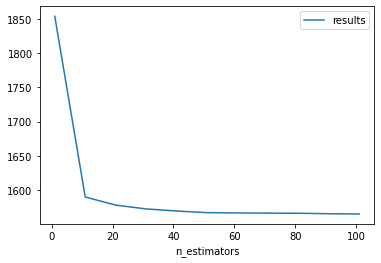

In [156]:
res_v1[res_v1['max_depth'] == 21].plot(kind='line', x='n_estimators', y='results')

При увеличении n_estimators больше 60, модель показывает приблизительно одинаковые результаты.

In [105]:
model_v1_2 = RandomForestRegressor(n_estimators=60, max_depth=21, random_state=111)

Проверим кросс-валидацией разброс оценок качества модели:

In [149]:
cross_val_score(model_v1_2, pd.concat(
    [features_valid_v1_2, features_train_v1_2]
), pd.concat(
    [target_valid_v1_2, target_train_v1_2]
), cv=5)

array([0.88332163, 0.88172015, 0.87733187, 0.88065028, 0.8825778 ])

Качество меняется незначительно.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Поиск гиперпараметров LGBMRegressor:

In [150]:
%%time
model_lgbmr_v1 = lgbm.sklearn.LGBMRegressor(n_estimators=1000, random_state=111, learning_rate=.05, objective='rmse')
model_lgbmr_v1.fit(features_train_v1_2, target_train_v1_2, eval_set=(features_valid_v1_2, target_valid_v1_2), verbose=100)

/opt/conda/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 1707.62
[200]	valid_0's rmse: 1625.74
[300]	valid_0's rmse: 1590.68
[400]	valid_0's rmse: 1572.68
[500]	valid_0's rmse: 1560.4
[600]	valid_0's rmse: 1549.64
[700]	valid_0's rmse: 1542.05
[800]	valid_0's rmse: 1536.47
[900]	valid_0's rmse: 1530.83
[1000]	valid_0's rmse: 1525.03
CPU times: user 4min 22s, sys: 3.08 s, total: 4min 25s
Wall time: 4min 29s


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='rmse',
              random_state=111)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>LGBM может сам кодировать категории, если их перевести в тип данных 'category', но эта кодровка занимает дополнительное время. Если кодировать OE, то получатся быстрее.</font>

In [151]:
%%time
learning_rates_v1 = []
results_v1 = []
for l_r in range(5, 45, 5):
    l_r = l_r / 100
    model_lgbmr_v1 = lgbm.sklearn.LGBMRegressor(n_estimators=1000, random_state=111, learning_rate=l_r)
    model_lgbmr_v1.fit(features_train_v1_2, target_train_v1_2)
    predictions_valid_v1 = model_lgbmr_v1.predict(features_valid_v1_2)
    result_v1 = mean_squared_error(target_valid_v1_2, predictions_valid_v1)
    learning_rates_v1.append(l_r)
    results_v1.append(result_v1)
    print(est, '\r', end='')

CPU times: user 3min 4s, sys: 1.26 s, total: 3min 5s
Wall time: 3min 6s


In [152]:
results = pd.DataFrame(results_v1, learning_rates_v1)

In [153]:
results[0] ** .5

0.05    1525.032036
0.10    1505.204911
0.15    1499.191176
0.20    1499.497075
0.25    1501.061503
0.30    1498.471115
0.35    1505.108486
0.40    1513.278974
Name: 0, dtype: float64

In [106]:
model_lgbmr_v1_2 = lgbm.sklearn.LGBMRegressor(n_estimators=1000, random_state=111, learning_rate=.2)

In [155]:
# cross_val_score(model_lgbmr_v1, pd.concat(
#     [features_valid_v1_2, features_train_v1_2]
# ), pd.concat(
#     [target_valid_v1_2, target_train_v1_2]
# ), cv=5)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

###  train и valid обработаны по алгоритму; таким же образом, перед предсказаниями модели, обрабатывается тестовая выборка

Используем те же train и valid выборки что и выше, тестовую предварительно обрабатываем. При тестировании будут использованы уже обученные модели.

### Все данные не обработаны

Поиск гиперпараметров модели RandomForestRegressor:

In [157]:
%%time
n_est_v3 = []
dep_v3 = []
results_v3 = []
for est in range(1, 102, 10):
    for depth in range(1, 51, 10):
        model_v3 = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=111)
        model_v3.fit(features_train_v3, target_train_v3.values.ravel())
        predictions_valid_v3 = model_v3.predict(features_valid_v3)
        result_v3 = mean_squared_error(target_valid_v3, predictions_valid_v3)
        dep_v3.append(depth)
        n_est_v3.append(est)
        results_v3.append(result_v3)
        print(est, '\r', end='')

CPU times: user 9min 26s, sys: 3.35 s, total: 9min 29s
Wall time: 9min 31s


In [163]:
res_v3 = pd.DataFrame(dep_v3, n_est_v3).reset_index()
res_v3.columns = ['n_estimators', 'max_depth']
res_v3['results'] = results_v3
res_v3['results'] = res_v3['results'] ** .5

In [164]:
res_v3

,n_estimators,max_depth,results
0,1,1,3807.295305
1,1,11,2220.457976
2,1,21,2350.664832
3,1,31,2364.914786
4,1,41,2366.976601
5,11,1,3807.188501
6,11,11,2072.209901
7,11,21,1944.900479
8,11,31,1958.251906
9,11,41,1955.645072


Лучшие результаты показывает модель с max_depth=21:

<AxesSubplot:xlabel='n_estimators'>

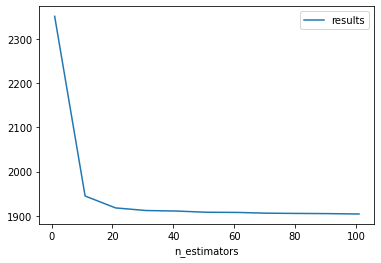

In [165]:
res_v3[res_v3['max_depth'] == 21].plot(kind='line', x='n_estimators', y='results')

In [107]:
model_v3 = RandomForestRegressor(n_estimators=40, max_depth=21, random_state=111)

Проверим кросс-валидацией разброс оценок качества модели:

In [167]:
cross_val_score(model_v3, pd.concat(
    [features_valid_v3, features_train_v3]
), pd.concat(
    [target_valid_v3, target_train_v3]
), cv=5)

array([0.82190736, 0.82334257, 0.82845947, 0.82278809, 0.82659646])

Поиск гиперпараметров LGBMRegressor:

In [168]:
%%time
model_lgbmr_v3 = lgbm.sklearn.LGBMRegressor(n_estimators=1000, random_state=111, learning_rate=.05, objective='rmse')
model_lgbmr_v3.fit(features_train_v3, target_train_v3, eval_set=(features_valid_v3, target_valid_v3), verbose=100)

/opt/conda/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 2050.63
[200]	valid_0's rmse: 1979.9
[300]	valid_0's rmse: 1946.07
[400]	valid_0's rmse: 1924.51
[500]	valid_0's rmse: 1908.98
[600]	valid_0's rmse: 1897.44
[700]	valid_0's rmse: 1888.09
[800]	valid_0's rmse: 1882.19
[900]	valid_0's rmse: 1875.83
[1000]	valid_0's rmse: 1870.49
CPU times: user 31.1 s, sys: 205 ms, total: 31.3 s
Wall time: 31.5 s


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='rmse',
              random_state=111)

In [169]:
%%time
learning_rates_v3 = []
results_v3 = []
for l_r in range(5, 45, 5):
    l_r = l_r / 100
    model_lgbmr_v3 = lgbm.sklearn.LGBMRegressor(n_estimators=1000, random_state=111, learning_rate=l_r)
    model_lgbmr_v3.fit(features_train_v3, target_train_v3)
    predictions_valid_v3 = model_lgbmr_v3.predict(features_valid_v3)
    result_v3 = mean_squared_error(target_valid_v3, predictions_valid_v3)
    learning_rates_v3.append(l_r)
    results_v3.append(result_v3)
    print(l_r, '\r', end='')

CPU times: user 4min 26s, sys: 1.71 s, total: 4min 28s
Wall time: 4min 31s


In [174]:
results = pd.DataFrame(results_v3, learning_rates_v3)

In [175]:
results[0] ** .5

0.05    1870.493966
0.10    1838.796286
0.15    1832.790400
0.20    1828.604310
0.25    1834.708379
0.30    1837.349876
0.35    1843.250121
0.40    1856.388917
Name: 0, dtype: float64

In [108]:
model_lgbmr_v3 = lgbm.sklearn.LGBMRegressor(n_estimators=100, random_state=111, learning_rate=.2, objective='rmse')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

## Анализ моделей

Обученные модели:

In [109]:
start = time.time()
model_v1_2.fit(features_train_v1_2, target_train_v1_2.values.ravel())
end = time.time()
t_fit_1 = round(end-start,2)
t_fit_2 = t_fit_1

In [110]:
t_fit_1

8.54

In [111]:
t_fit_2

8.54

In [112]:
start = time.time()
model_lgbmr_v1_2.fit(features_train_v1_2, target_train_v1_2.values.ravel())
end = time.time()
t_lgbmr_fit_1 = round(end-start,2)
t_lgbmr_fit_2 = t_lgbmr_fit_1

In [113]:
t_lgbmr_fit_1

17.74

In [114]:
t_lgbmr_fit_2

17.74

In [115]:
start = time.time()
model_v3.fit(features_train_v3, target_train_v3.values.ravel())
end = time.time()
t_fit_3=round(end-start,2)

In [116]:
t_fit_3

10.02

In [117]:
start = time.time()
model_lgbmr_v3.fit(features_train_v3, target_train_v3)
end = time.time()
t_lgbmr_fit_3=round(end-start,2)

In [118]:
t_lgbmr_fit_3

2.91

In [119]:
t_fit = [t_fit_1, t_fit_2, t_fit_3, t_lgbmr_fit_1, t_lgbmr_fit_2, t_lgbmr_fit_3]

In [120]:
t_fit

[8.54, 8.54, 10.02, 17.74, 17.74, 2.91]

Предсказания моделей:

In [121]:
start = time.time()
predictions_v1 = model_v1_2.predict(features_test_v1)
end = time.time()
t_pred_1 = round(end-start,2)

In [122]:
t_pred_1

1.94

In [123]:
start = time.time()
predictions_lgbmr_v1 = model_lgbmr_v1_2.predict(features_test_v1)
end = time.time()
t_lgbmr_pred_1 = round(end-start,2)

In [124]:
t_lgbmr_pred_1

12.12

In [125]:
start = time.time()
predictions_v2 = model_v1_2.predict(features_test_v2)
end = time.time()
t_pred_2 = round(end-start,2)

In [126]:
t_pred_2

1.39

In [127]:
start = time.time()
predictions_lgbmr_v2 = model_lgbmr_v1_2.predict(features_test_v2)
end = time.time()
t_lgbmr_pred_2 = round(end-start,2)

In [128]:
t_lgbmr_pred_2

8.47

In [129]:
start = time.time()
predictions_v3 = model_v3.predict(features_test_v3)
end = time.time()
t_pred_3=round(end-start,2)

In [130]:
t_pred_3

1.54

In [131]:
start = time.time()
predictions_lgbmr_v3 = model_lgbmr_v3.predict(features_test_v3)
end = time.time()
t_lgbmr_pred_3=round(end-start,2)

In [132]:
t_lgbmr_pred_3

0.85

In [133]:
t_pred = [t_pred_1, t_pred_2, t_pred_3, t_lgbmr_pred_1, t_lgbmr_pred_2, t_lgbmr_pred_3]
t_pred

[1.94, 1.39, 1.54, 12.12, 8.47, 0.85]

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично что время обучения и время работы моделей измерено отдельно.</font>

RMSE моделей:

In [134]:
rmse_1 = mean_squared_error(target_test_v1, predictions_v1) ** .5
round(rmse_1, 0)

2131.0

In [135]:
rmse_lgbmr_1 = mean_squared_error(target_test_v1, predictions_lgbmr_v1) ** .5
round(rmse_lgbmr_1, 0)

2100.0

In [136]:
rmse_2 = mean_squared_error(target_test_v2, predictions_v2) ** .5
round(rmse_2, 0)

1566.0

In [137]:
rmse_lgbmr_2 = mean_squared_error(target_test_v2, predictions_lgbmr_v2) ** .5
round(rmse_lgbmr_2, 0)

1489.0

In [138]:
rmse_3 = mean_squared_error(target_test_v3, predictions_v3) ** .5
round(rmse_3, 0)

1907.0

In [139]:
rmse_lgbmr_3 = mean_squared_error(target_test_v3, predictions_lgbmr_v3) ** .5
round(rmse_lgbmr_3, 0)

1915.0

In [140]:
rmse = [rmse_1, rmse_2, rmse_3, rmse_lgbmr_1, rmse_lgbmr_2, rmse_lgbmr_3]
for i in range(len(rmse)):
    rmse[i] = round(rmse[i], 0)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> RMSE можно получить передав параметр `squared= False` в `mean_squared_error`</font>

In [141]:
t_prepr_2

4.3

In [142]:
t_prepr = [t_prepr_1, t_prepr_2, t_prepr_3, t_prepr_1, t_prepr_2, t_prepr_3]
t_sum = pd.Series(t_fit) + pd.Series(t_pred) + pd.Series(t_prepr)

In [143]:
score = t_sum / min(t_sum) + rmse / min(rmse)

In [144]:
table = pd.DataFrame([t_fit, t_pred, t_prepr, t_sum, rmse, score])
table.columns = ['RandomForestRegressor_1',
              'RandomForestRegressor_2',
              'RandomForestRegressor_3',
              'LGBMR_1',
              'LGBMR_2',
              'LGBMR_3']
table.index = ['Время обучения', 'Время предсказания', 'Время обработки данных', 'Общее время работы', 'RMSE', 'Оценка']

Таблица с показателями работы моделей:

In [145]:
table

,RandomForestRegressor_1,RandomForestRegressor_2,RandomForestRegressor_3,LGBMR_1,LGBMR_2,LGBMR_3
Время обучения,8.540000,8.540000,10.020000,17.74000,17.740000,2.910000
Время предсказания,1.940000,1.390000,1.540000,12.12000,8.470000,0.850000
Время обработки данных,3.080000,4.300000,2.940000,3.08000,4.300000,2.940000
Общее время работы,13.560000,14.230000,14.500000,32.94000,30.510000,6.700000
RMSE,2131.000000,1566.000000,1907.000000,2100.00000,1489.000000,1915.000000
Оценка,3.455042,3.175593,3.444904,6.32676,5.553731,2.286098


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

В таблице рассмотрены показатели (время работы и метрика RMSE) двух моделей: RandomForestRegressor и LGBMR, для трех вариантов обработки данных: 
1. Тестовый набор данных не обработан, train и valid обработаны 
2. train и valid обработаны по алгоритму; таким же образом, перед предсказаниями модели, обрабатывается тестовая выборка
3. Все данные не обработаны

Итоговая оценка посчитана как сумма коэффициентов на которые нужно умножить минимальные значения времени и RMSE.
По общей оценке выбираем модель LGBMR_3, но для улучшения качества можно использовать обработку входящих данных, в этом случае, как со 2 вариантом обработки, качество модели улучшится, а для ускорения работы можно использовать модель RandomForestRegressor_2.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Графики зависимостей предсказанных значений от целевых:

Text(0.5, 1.0, 'LGBMR_3')

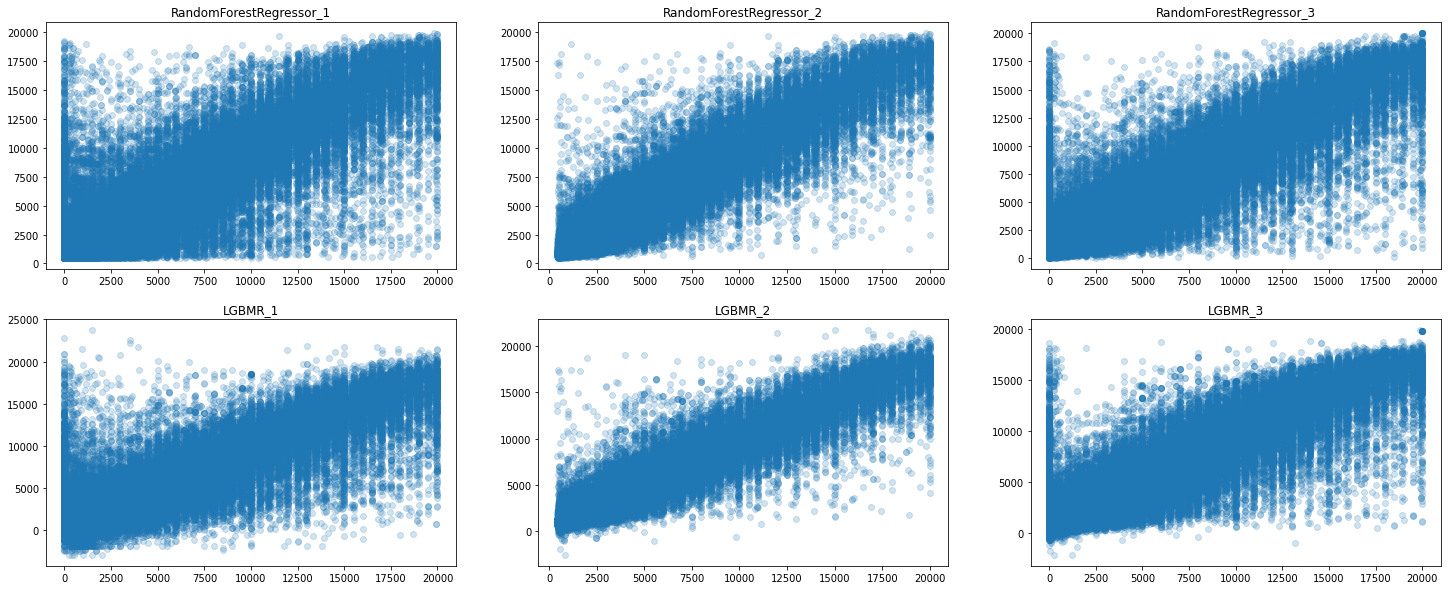

In [213]:
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('')
axs[0,0].scatter(pd.DataFrame(target_test_v1).join(pd.DataFrame(predictions_v1))['price'],
               pd.DataFrame(target_test_v1).join(pd.DataFrame(predictions_v1))[0],
               alpha=.2
              )
axs[0,0].set_title('RandomForestRegressor_1')
axs[1,0].scatter(pd.DataFrame(target_test_v1).join(pd.DataFrame(predictions_lgbmr_v1))['price'],
               pd.DataFrame(target_test_v1).join(pd.DataFrame(predictions_lgbmr_v1))[0],
               alpha=.2
              )
axs[1,0].set_title('LGBMR_1')
axs[0,1].scatter(pd.DataFrame(target_test_v2).join(pd.DataFrame(predictions_v2))['price'],
               pd.DataFrame(target_test_v2).join(pd.DataFrame(predictions_v2))[0],
               alpha=.2
              )
axs[0,1].set_title('RandomForestRegressor_2')
axs[1,1].scatter(pd.DataFrame(target_test_v2).join(pd.DataFrame(predictions_lgbmr_v2))['price'],
               pd.DataFrame(target_test_v2).join(pd.DataFrame(predictions_lgbmr_v2))[0],
               alpha=.2
              )
axs[1,1].set_title('LGBMR_2')
axs[0,2].scatter(pd.DataFrame(target_test_v3).join(pd.DataFrame(predictions_v3))['price'],
               pd.DataFrame(target_test_v3).join(pd.DataFrame(predictions_v3))[0],
               alpha=.2
              )
axs[0,2].set_title('RandomForestRegressor_3')
axs[1,2].scatter(pd.DataFrame(target_test_v3).join(pd.DataFrame(predictions_lgbmr_v3))['price'],
               pd.DataFrame(target_test_v3).join(pd.DataFrame(predictions_lgbmr_v3))[0],
               alpha=.2
              )
axs[1,2].set_title('LGBMR_3')

В ходе работы были исследованы различные варианты моделей для поиска рыночной цены автомобиля по его параметрам. Проведено сравнение моделей, предложено обрабатывать входящие данные для улучшения качества предсказаний.

<font color='blue'><b>Итоговый комментарий ревьюера </b></font> \
<font color='green'>Женя, хороший проект получился! Большое спасибо за проделанную работу. Видно, что приложено много усилий. Полностью описан ход решения, даны все необходимые пояснения, выводы полные и логичные.

<font color='green'><b>Работа уже может быть зачтена</b>, отправляю обратно, чтобы была возможность задать вопросы если они есть  ))).</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Мы, с коллегами, решили сделать небольшое дополнение к курсу по этому спринту.  https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing </font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Женя, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей